In [144]:
#data = "C:\\Users\\myral\\Downloads\\unemployment_rates_states.csv"

In [145]:
import numpy as np
import pandas as pd

state_data = pd.read_csv("unemployment_rates_states.csv")
state_data.head(10)

,state_name,first_covid_case,9_2019_unemployment,10_2019_unemployment,11_2019_unemployment,12_2019_unemployment,1_2020_unemployment,2_2020_unemployment,3_2020_unemployment,4_2020_unemployment,5_2020_unemployment,6_2020_unemployment,7_2020_unemployment,8_2020_unemployment,9_2020_unemployment,10_2020_unemployment,2019_population_estimates,2020_population_estimates
0,Alabama,3/13/2020,0.03,NaN,NaN,0.03,0.03,0.03,0.03,0.13,0.08,0.08,0.07,0.07,0.07,0.05,4903185,5024803
1,Alaska,3/12/2020,0.06,NaN,NaN,0.06,0.05,0.05,0.05,0.12,0.12,0.11,0.11,0.07,0.07,0.07,731545,732441
2,Arizona,1/26/2020,0.05,NaN,NaN,0.04,0.05,0.05,0.05,0.14,0.11,0.11,0.10,0.07,0.07,0.07,7278717,7177986
3,Arkansas,3/11/2020,0.04,NaN,NaN,0.04,0.04,0.04,0.04,0.10,0.09,0.08,0.07,0.07,0.06,0.06,3017804,3012232
4,California,1/26/2020,0.04,NaN,NaN,0.04,0.04,0.04,0.04,0.16,0.16,0.14,0.13,0.12,0.11,0.10,39512223,39499738
5,Colorado,3/6/2020,0.03,NaN,NaN,0.03,0.03,0.03,0.05,0.12,0.12,0.11,0.07,0.07,0.07,0.07,5758736,5784308
6,Connecticut,3/9/2020,0.04,NaN,NaN,0.04,0.04,0.04,0.04,0.09,0.11,0.11,0.11,0.08,0.08,0.08,3565287,3600260
7,Delaware,3/12/2020,0.04,NaN,NaN,0.04,0.04,0.04,0.05,0.13,0.13,0.13,0.08,0.08,0.08,0.06,973764,991886
8,Florida,3/2/2020,0.03,NaN,NaN,0.03,0.03,0.03,0.05,0.14,0.14,0.12,0.12,0.08,0.07,0.06,21477737,21569932
9,Georgia,3/3/2020,0.03,NaN,NaN,0.03,0.03,0.04,0.04,0.12,0.09,0.08,0.08,0.07,0.07,0.06,10617423,10725800


In [146]:
state_data.info()
# data already like floats and ints so do not need to convert

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state_name                 50 non-null     object 
 1   first_covid_case           50 non-null     object 
 2   9_2019_unemployment        50 non-null     float64
 3   10_2019_unemployment       0 non-null      float64
 4   11_2019_unemployment       0 non-null      float64
 5   12_2019_unemployment       50 non-null     float64
 6   1_2020_unemployment        50 non-null     float64
 7   2_2020_unemployment        50 non-null     float64
 8   3_2020_unemployment        50 non-null     float64
 9   4_2020_unemployment        50 non-null     float64
 10  5_2020_unemployment        50 non-null     float64
 11  6_2020_unemployment        50 non-null     float64
 12  7_2020_unemployment        50 non-null     float64
 13  8_2020_unemployment        50 non-null     float64
 

In [147]:
state_data.columns
#first want to deal with the census data
#Goal: to see how many people are unemployed rather than the percent of people unemployed
# if the column name has 2020 in it, I want to multiply it by 2020 population estimate
# if the column has 2019 in it, I want to multiply it by the 2019 population estimate

Index(['state_name', 'first_covid_case', '9_2019_unemployment',
       '10_2019_unemployment', '11_2019_unemployment', '12_2019_unemployment',
       '1_2020_unemployment', '2_2020_unemployment', '3_2020_unemployment',
       '4_2020_unemployment', '5_2020_unemployment', '6_2020_unemployment',
       '7_2020_unemployment', '8_2020_unemployment', '9_2020_unemployment',
       '10_2020_unemployment', '2019_population_estimates',
       '2020_population_estimates'],
      dtype='object')

In [148]:
# rather than looking at percent of people unemployed, we want to look at the 
# number of people unemployed so we multiplied the data by the census population
# for that state
for col in state_data.columns:
    if "2019" in col and "unemployment" in col:
        state_data[col] = state_data[col] *state_data["2019_population_estimates"]
    elif "2020" in col and "unemployment" in col:
        state_data[col] = state_data[col] * state_data["2020_population_estimates"]
state_data.to_csv("census_updated_state_data", index = False)

In [149]:
state_data.head()

,state_name,first_covid_case,9_2019_unemployment,10_2019_unemployment,11_2019_unemployment,12_2019_unemployment,1_2020_unemployment,2_2020_unemployment,3_2020_unemployment,4_2020_unemployment,5_2020_unemployment,6_2020_unemployment,7_2020_unemployment,8_2020_unemployment,9_2020_unemployment,10_2020_unemployment,2019_population_estimates,2020_population_estimates
0,Alabama,3/13/2020,132385.99,NaN,NaN,132385.99,135669.68,130644.88,130644.88,663274.00,396959.44,386909.83,371835.42,356761.01,336661.80,236165.74,4903185,5024803
1,Alaska,3/12/2020,45355.79,NaN,NaN,44624.25,36622.05,37354.49,37354.49,86428.04,84963.16,82765.83,80568.51,52735.75,51270.87,47608.67,731545,732441
2,Arizona,1/26/2020,334820.98,NaN,NaN,327542.27,344543.33,351721.31,358899.30,1019274.01,760866.52,768044.50,746510.54,502459.02,495281.03,488103.05,7278717,7177986
3,Arkansas,3/11/2020,108640.94,NaN,NaN,105623.14,111452.58,114464.82,117477.05,301223.20,256039.72,234954.10,213868.47,195795.08,177721.69,168684.99,3017804,3012232
4,California,1/26/2020,1540976.70,NaN,NaN,1540976.70,1658989.00,1698488.73,1777488.21,6319958.08,6161959.13,5569463.06,5213965.42,4858467.77,4186972.23,3870974.32,39512223,39499738


In [150]:
"""
Function get_months():
- this is used to calculate the months for each of the phases
- For phase1before, we need the unemployment rates for three months before
  the state's covid date
- for phase1after, we need the first three months after the covid date for the state
- for phase2after, we need to the second three months after the covid date for the state
- this function will help find the months that we need to look at in the state_data in 
  order to take the averages of the unemployment rates
- state_covid_month: the month that the state got it's first covid case
- num_of_phase_months: the number of months for each of the phase (for us it will
  always be 3)
- forward_or_back: whether we want to look at months before the covid date or 
  months after (1 for looking after the covid date and -1 for looking at months before
  covid date)
- we need to accommodate for months like december and january where the numbers 
  can get negative or over 12 (which are not the typical 1-12 months)
      - if the month is negative, that means that we need to add like 12 months for ex
        if we had negative 1, this means that we need to look at december from the 
        previous year
     - if the month is really big (over 12), for ex 13, this means we have to subtract 12
       because we need to look at January from the next year
"""
def find_the_months(state_covid_month, num_of_phase_months, forward_or_back):
    months_to_average = []
    for i in range(1, num_of_phase_months+1):
        next_month = state_covid_month + i*forward_or_back
        if next_month < 1:
            next_month += 12
        elif next_month > 12:
            next_month -= 12
        months_to_average.append(next_month)
    return months_to_average
        

In [151]:
"""
Next, we need to find out what the first covid date for each state is so
the function knows which month and year to reference when trying to 
calculate the months for the phases. 

Since the dates are separated by slashes, we split the string on that and then
made the first part the month, the second part the day, and the third part 
the year

We then converted these values to integers because we can't make numerical
comparisons if they are still strings
"""
for i, row in state_data.iterrows():
    first_covid_case_for_state = row["first_covid_case"]
    date_split = first_covid_case_for_state.split("/")
    first_covid_month = int(date_split[0])
    first_covid_day = int(date_split[1])
    first_covid_year = int(date_split[2])
    print(first_covid_month)
    print(first_covid_day)
    print(first_covid_year)

3
13
2020
3
12
2020
1
26
2020
3
11
2020
1
26
2020
3
6
2020
3
9
2020
3
12
2020
3
2
2020
3
3
2020
3
7
2020
3
14
2020
1
24
2020
3
6
2020
3
9
2020
3
8
2020
3
9
2020
3
9
2020
3
12
2020
3
6
2020
2
1
2020
3
10
2020
3
6
2020
3
12
2020
3
8
2020
3
13
2020
3
6
2020
3
5
2020
3
2
2020
3
5
2020
3
11
2020
3
2
2020
3
3
2020
3
12
2020
3
9
2020
3
7
2020
2
29
2020
3
6
2020
3
1
2020
3
6
2020
3
9
2020
3
5
2020
3
5
2020
3
7
2020
3
8
2020
3
8
2020
1
22
2020
3
17
2020
3
9
2020
3
12
2020


In [152]:
"""
Now we are onto our first calculation: phase1before

phase1before: the phase that averages the unemployment rate for three months
before the first covid case for the state. This is used as a baseline to observe
how COVID inpacked the unemployment rate as covid cases began to rise in the state

We first find the 3 months before the covid date using the find_the_months() function
(for ex: if New York got its first covid case in March, that resembles 3 so the 
find_the_months() function would get 2,1,12 for december, january, and february ) 

Then we have to figure out if the month is greater than the month of the first covid case.
Since we are explicitely looking at the months before covid began, if the month we found
through the find_the_months() function is greater than the covid month, this means that 
this month is from the previous year (2019). This ensures that we are going to look at 
the right column when taking the averages

Then we create an f-string with the relevant month and year for unemployment so we 
know exactly what columns to look at when take the average of the unemployment rate for 
the three months

Note: we use the zip files to pair the month and the year together so we can
more easily create the f-string
"""

months_before_covid = find_the_months(first_covid_month, 3, -1)
print(first_covid_month)
print(months_before_covid)
years_before_covid = []
for month in months_before_covid:
    if month > first_covid_month:
        years_before_covid.append(first_covid_year - 1)
    else:
        years_before_covid.append(first_covid_year)
        
relevant_columns_before = []
for month, year in zip(months_before_covid, years_before_covid):
    relevant_columns_before.append(f"{month}_{year}_unemployment")

print(relevant_columns_before)



3
[2, 1, 12]
['2_2020_unemployment', '1_2020_unemployment', '12_2019_unemployment']


In [153]:
"""
phase1after: looking at the first three months after the first covid case occurs in the 
state (for ex: if NY had its first covid case in March, we would find the months 
April, May, and June)

Similar logic to the phase1before code, and if the month is less than the first covid
month in this case, that means that we have moved onto the next year (for ex: if we 
are in december for the first covid date and we have the next three months in Jan, 
Feb, and March, we would need to append the next year into the list.
"""
phase1after_months = find_the_months(first_covid_month, 3, 1)
phase1after_years = []
for month in phase1after_months:
    if month < first_covid_month:
        phase1after_years.append(first_covid_year + 1)
    else:
        phase1after_years.append(first_covid_year)


phase1after_rel_cols = []
for month, year in zip(phase1after_months, phase1after_years):
    phase1after_rel_cols.append(f"{month}_{year}_unemployment")

In [154]:
# same logic but now looking at phase2after
# phase2after: the next 3 months after phase1after
phase2after_months = find_the_months(first_covid_month + 3, 3, 1)
phase2after_years = []
for month in phase2after_months:
    if month < first_covid_month + 3:
        phase2after_years.append(first_covid_year + 1)
    else:
        phase2after_years.append(first_covid_year)
        
phase2after_rel_cols = []
for month, year in zip(phase2after_months, phase2after_years):
    phase2after_rel_cols.append(f"{month}_{year}_unemployment")

print(f"Before columns: {relevant_columns_before}")
print(f"After1 columns: {phase1after_rel_cols}")
print(f"After2 columns: {phase2after_rel_cols}")

Before columns: ['2_2020_unemployment', '1_2020_unemployment', '12_2019_unemployment']
After1 columns: ['4_2020_unemployment', '5_2020_unemployment', '6_2020_unemployment']
After2 columns: ['7_2020_unemployment', '8_2020_unemployment', '9_2020_unemployment']


In [155]:
"""
For this, we wanted to go through each state and take the average of the unemployment values for each of the phases
We put this in a loop so it goes through every single state
The .at ensures that we access a single value for the unemployment rates (i=0,1,2)
We put the skipna=True because some of the months do not have documented unemployment rates
"""
def find_phase_averages(state_data, relevant_columns_before, phase1after_rel_cols, phase2after_rel_cols):
    for i, row in state_data.iterrows():
        if relevant_columns_before:
            state_data.at[i,"phase1before"] = row[relevant_columns_before].mean(skipna=True)
        if phase1after_rel_cols:
            state_data.at[i, "phase1after"] = row[phase1after_rel_cols].mean(skipna=True)
        if phase2after_rel_cols:
            state_data.at[i, "phase2after"] = row[phase2after_rel_cols].mean(skipna=True)
    return state_data


In [156]:
state_data = find_phase_averages(state_data, relevant_columns_before, phase1after_rel_cols, phase2after_rel_cols)


In [157]:
state_data.head(100)



,state_name,first_covid_case,9_2019_unemployment,10_2019_unemployment,11_2019_unemployment,12_2019_unemployment,1_2020_unemployment,2_2020_unemployment,3_2020_unemployment,4_2020_unemployment,...,6_2020_unemployment,7_2020_unemployment,8_2020_unemployment,9_2020_unemployment,10_2020_unemployment,2019_population_estimates,2020_population_estimates,phase1before,phase1after,phase2after
0,Alabama,3/13/2020,132385.99,NaN,NaN,132385.99,135669.68,130644.88,130644.88,663274.00,...,386909.83,371835.42,356761.01,336661.80,236165.74,4903185,5024803,132900.18,482381.09,355086.08
1,Alaska,3/12/2020,45355.79,NaN,NaN,44624.25,36622.05,37354.49,37354.49,86428.04,...,82765.83,80568.51,52735.75,51270.87,47608.67,731545,732441,39533.60,84719.01,61525.04
2,Arizona,1/26/2020,334820.98,NaN,NaN,327542.27,344543.33,351721.31,358899.30,1019274.01,...,768044.50,746510.54,502459.02,495281.03,488103.05,7278717,7177986,341268.97,849395.01,581416.87
3,Arkansas,3/11/2020,108640.94,NaN,NaN,105623.14,111452.58,114464.82,117477.05,301223.20,...,234954.10,213868.47,195795.08,177721.69,168684.99,3017804,3012232,110513.51,264072.34,195795.08
4,California,1/26/2020,1540976.70,NaN,NaN,1540976.70,1658989.00,1698488.73,1777488.21,6319958.08,...,5569463.06,5213965.42,4858467.77,4186972.23,3870974.32,39512223,39499738,1632818.14,6017126.76,4753135.14
5,Colorado,3/6/2020,149727.14,NaN,NaN,143968.40,156176.32,161960.62,271862.48,699901.27,...,653626.80,428038.79,410685.87,404901.56,399117.25,5758736,5784308,154035.11,674835.93,414542.07
6,Connecticut,3/9/2020,131915.62,NaN,NaN,135480.91,133209.62,133209.62,136809.88,309622.36,...,410429.64,406829.38,302421.84,298821.58,295221.32,3565287,3600260,133966.72,376827.21,336024.27
7,Delaware,3/12/2020,37976.80,NaN,NaN,38950.56,42651.10,44634.87,47610.53,132912.72,...,127953.29,82326.54,78358.99,75383.34,56537.50,973764,991886,42078.84,130928.95,78689.62
8,Florida,3/2/2020,622854.37,NaN,NaN,622854.37,711807.76,711807.76,1056926.67,3019790.48,...,2502112.11,2480542.18,1704024.63,1553035.10,1251056.06,21477737,21569932,682156.63,2861610.98,1912533.97
9,Georgia,3/3/2020,339757.54,NaN,NaN,329140.11,353951.40,375403.00,386128.80,1340725.00,...,900967.20,815160.80,750806.00,697177.00,632822.20,10617423,10725800,352831.50,1083305.80,754381.27


In [158]:
state_data.to_csv("state_data.csv", index=False)


In [159]:
"""
Revisiting our goals and hypothesis:
Our new goal now is to find a correlation between unemployment rate and the spread of covid. 
Our hypothesis again is we want to prove that the spread of covid does highly affect unemployment rate.

Here we changed the state_data.csv to an index for state_name, 
with columns: first_covid_case,
phase1before(average of the unemployment number in the 3 months prior to the first covid date),
phase1after(avg of the unemployment number in the 3 months after the first covid date),
and phase2after(avg of the unemployment number in the 4-6 months after the first covid date).
And I set and converted the floating numbers to 2 decimal places for better reading the numbers.  
"""

state_data = state_data[["state_name", "first_covid_case","phase1before", "phase1after","phase2after"]].set_index(["state_name"])
pd.set_option('display.float_format', lambda x: '%.2f' % x)
state_data.to_csv("state_data.csv", index=False)
state_data.head(10)

,first_covid_case,phase1before,phase1after,phase2after
state_name,,,,
Alabama,3/13/2020,132900.18,482381.09,355086.08
Alaska,3/12/2020,39533.60,84719.01,61525.04
Arizona,1/26/2020,341268.97,849395.01,581416.87
Arkansas,3/11/2020,110513.51,264072.34,195795.08
California,1/26/2020,1632818.14,6017126.76,4753135.14
Colorado,3/6/2020,154035.11,674835.93,414542.07
Connecticut,3/9/2020,133966.72,376827.21,336024.27
Delaware,3/12/2020,42078.84,130928.95,78689.62
Florida,3/2/2020,682156.63,2861610.98,1912533.97


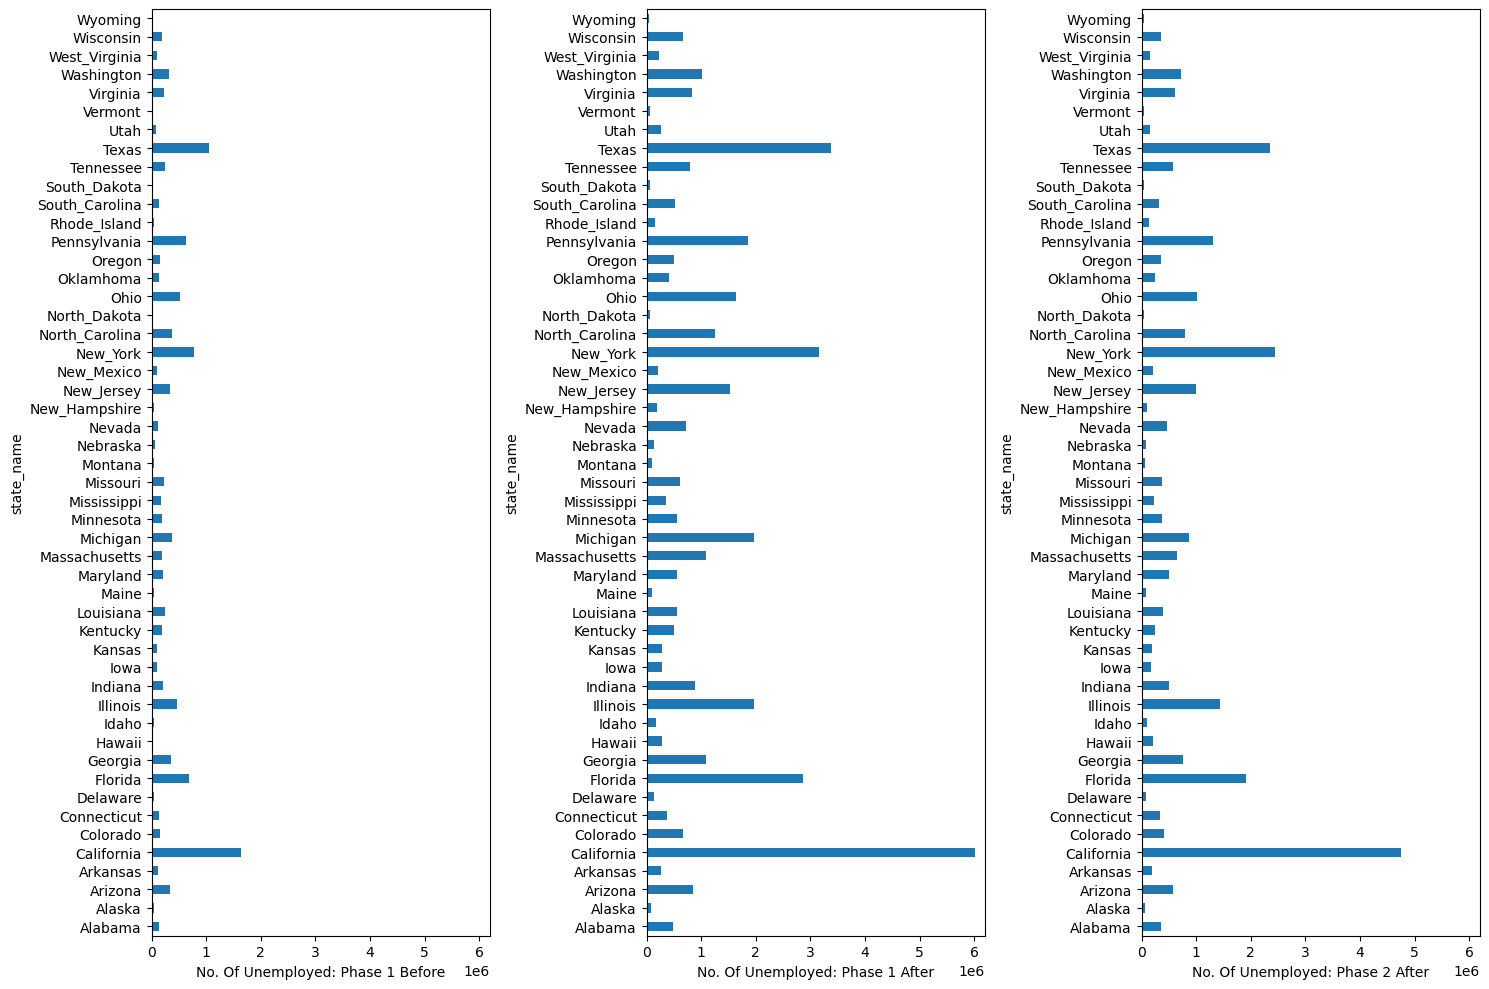

In [160]:
"""
We want to create a subplot with 3 histograms, one of each phases. 
On the left is the number of unemployed people in each state in phase 1 before,
the middle is the number of unemployed people in each state in phase 1 after,
the right is the number of unemployed people in each state in phase 2 after.
"""
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,10))
state_data.phase1before.plot(kind='barh', ax=ax1)  # 'barh' means horizontal bar plot
ax1.set_xlabel("No. Of Unemployed: Phase 1 Before")
ax1.set_xlim(0, 6.2e6)
state_data.phase1after.plot(kind='barh', ax=ax2)
ax2.set_xlabel("No. Of Unemployed: Phase 1 After")
ax2.set_xlim(0, 6.2e6)
state_data.phase2after.plot(kind='barh', ax=ax3)
ax3.set_xlabel("No. Of Unemployed: Phase 2 After")
ax3.set_xlim(0, 6.2e6)
plt.tight_layout()

In [161]:
"""
Now we aim to find the change in unemployment rate from the phase 1 before to phase 1 after.
We do this by making a column called difffrom1ato1b: representing the percentage difference from phase 1 before to phase 1 after.
Then we locate which state has the max amount of percentage difference.
We got the result Hawaii.
"""
state_data['difffrom1ato1b'] = (state_data['phase1after'] - state_data['phase1before'])/state_data['phase1before']
max_incfrom1ato1b = state_data.loc[state_data['difffrom1ato1b'].idxmax()]
max_incfrom1ato1b

first_covid_case    3/7/2020
phase1before        32585.63
phase1after        280218.82
phase2after        208107.24
difffrom1ato1b          7.60
Name: Hawaii, dtype: object

In [162]:
"""
Very similar to what we did above but incstead now we find the change in unemployment rate from phase 1 after to phase 2 after.
We find this by making a column called difffrom2ato1a: representing the percentage difference from phase 1 after to phase 2 after.
Then again, we locate which state has the max amount of percentage difference from phase 1 after to phase 2 after.
We got the result New Mexico.
"""
state_data['difffrom2ato1a'] = (state_data['phase2after'] - state_data['phase1after'])/state_data['phase1after']
max_incfrom2ato1a = state_data.loc[state_data['difffrom2ato1a'].idxmax()]
max_incfrom2ato1a

first_covid_case    3/11/2020
phase1before        106958.22
phase1after         210344.89
phase2after         214580.02
difffrom1ato1b           0.97
difffrom2ato1a           0.02
Name: New_Mexico, dtype: object

In [163]:
"""
This functions aims to make 3 graphs. A line graph representing the number of unemployed people in the 3 phases.
A pie chart representing the number of unemployed people in the 3 phases.
The percentages differences of phase 1 before to phase 1 after, and phase 1 after to phase 2 after.

Input: state = user will need to put the name of the state in state_name that they want the information from.
Output: the 3 graphs listed above and also the information of the state such as first_covid_case, phase1before
phase1after, phase2after, difffrom1ato1b, and difffrom2ato1a (aka the columns of "state")
as we made variable state = the given state and changed its cell values to numerical.

Remember again that:

difffrom1ato1b: representing the percentage difference from phase 1 before to phase 1 after.
difffrom2ato1a: representing the percentage difference from phase 1 after to phase 2 after.
phase1before: average of the unemployment number in the 3 months prior to the first covid date.
phase1after: average of the unemployment number in the 3 months after the first covid date.
phase2after: average of the unemployment number in the 4-6 months after the first covid date.
"""

def state_phases_graphs(state):

    state = state_data.loc[state]
    
    state = state.apply(pd.to_numeric, errors='coerce')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

    state[['phase1before', 'phase1after', 'phase2after']].plot(kind='line', ax=ax1, color='skyblue')
    ax1.set_xlabel("Phases")
    ax1.set_ylabel("Unemployment Number")
    ax1.set_title("Unemployment Number in the 3 Phases")
    
    state[['difffrom1ato1b', 'difffrom2ato1a']].plot(kind='bar', ax=ax2, color='lightgreen')
    ax2.set_xlabel("Phases Changes")
    ax2.set_ylabel("Percentage Difference")
    ax2.set_title("Unemployment Percentage Differences from the Phases")
    ax2.set_ylim(-0.6,7.6)

    plt.show()
    
    pie = state[['phase1before', 'phase1after', 'phase2after']].plot(kind='pie', color='skyblue')
    pie.set_xlabel("Phases")
    pie.set_title("Unemployment Number in the 3 Phases")

    
    plt.show()
    
    return state

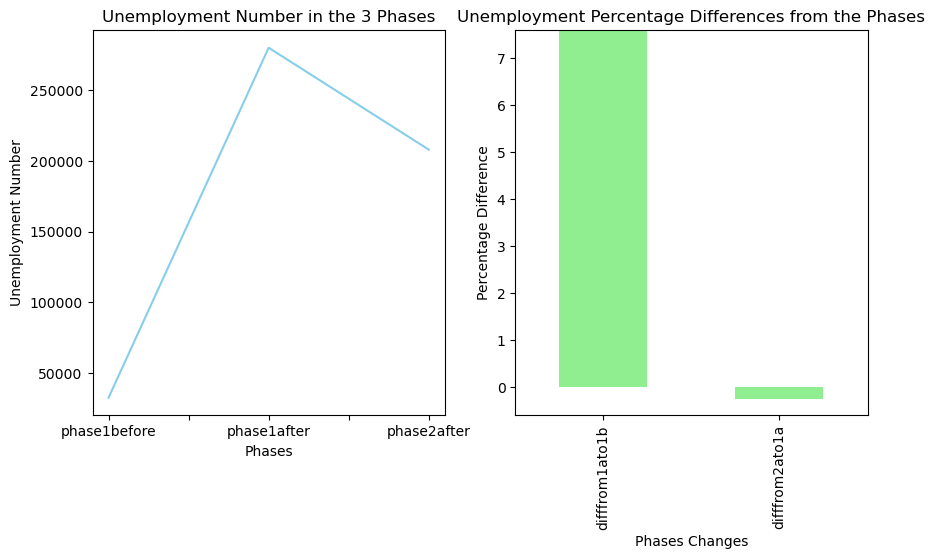

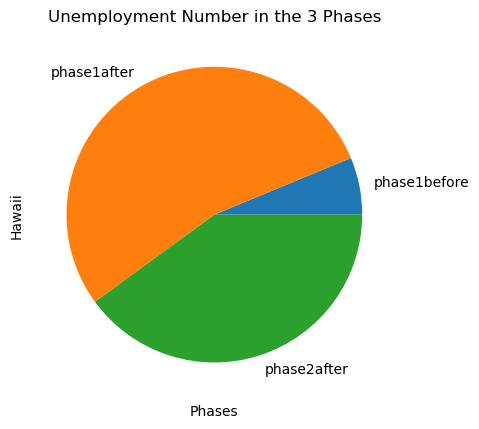

first_covid_case         NaN
phase1before        32585.63
phase1after        280218.82
phase2after        208107.24
difffrom1ato1b          7.60
difffrom2ato1a         -0.26
Name: Hawaii, dtype: float64

In [164]:
"""
Showing Hawaii because we found out that Hawaii has the highest percentage difference from phase 1 before to phase 1 after.
"""

state_phases_graphs("Hawaii")

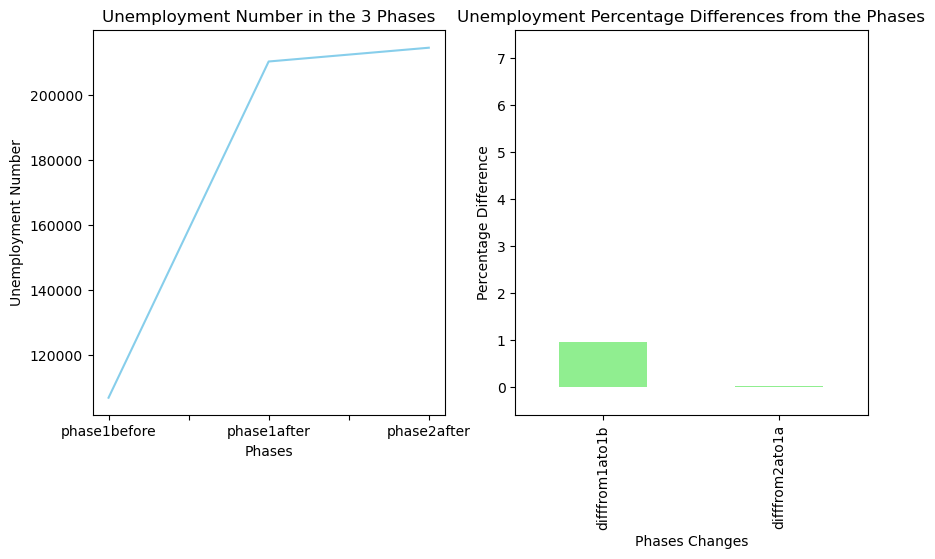

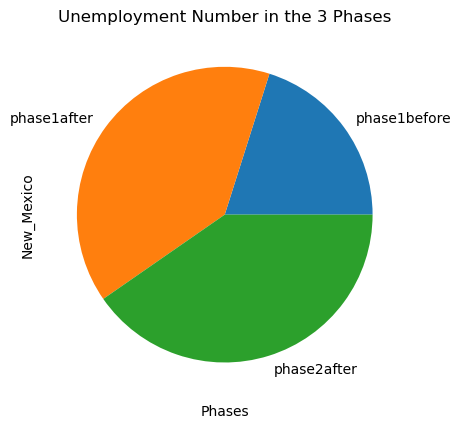

first_covid_case         NaN
phase1before       106958.22
phase1after        210344.89
phase2after        214580.02
difffrom1ato1b          0.97
difffrom2ato1a          0.02
Name: New_Mexico, dtype: float64

In [165]:
"""
Showing New Mexico because we found out that New Mexico has the highest percentage difference from phase 1 after to phase 2 after.

"""
state_phases_graphs("New_Mexico")

In [166]:
"""
Again, we aim to find the change in unemployment rate from the phase 1 before to phase 1 after.
Now we reuse the column difffrom1ato1b (representing the percentage difference from phase 1 before to phase 1 after),
to locate which state has the MINIMUM amount of percentage difference from phase 1 before to phase 1 after.
We got the result Wyoming.
"""

min_from1ato1b = state_data.loc[state_data['difffrom1ato1b'].idxmin()]
min_from1ato1b

first_covid_case    3/12/2020
phase1before         24840.88
phase1after          41178.38
phase2after          35982.98
difffrom1ato1b           0.66
difffrom2ato1a          -0.13
Name: Wyoming, dtype: object

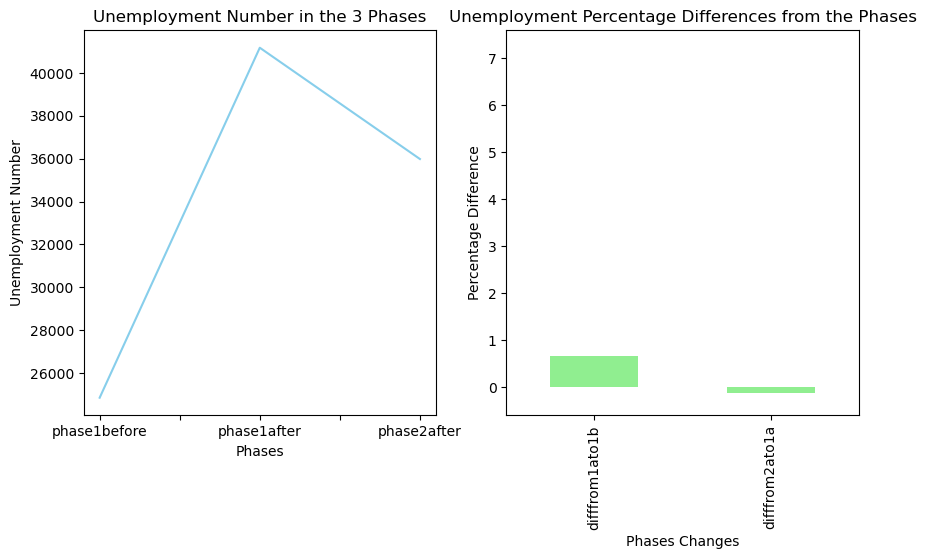

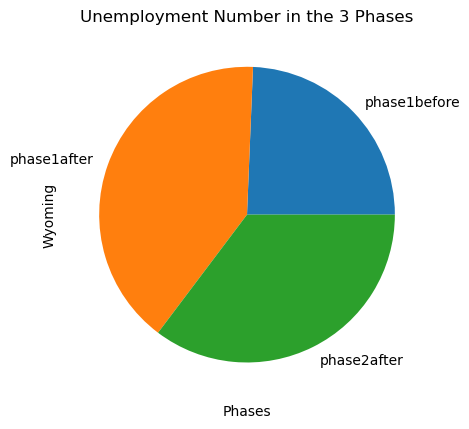

first_covid_case        NaN
phase1before       24840.88
phase1after        41178.38
phase2after        35982.98
difffrom1ato1b         0.66
difffrom2ato1a        -0.13
Name: Wyoming, dtype: float64

In [167]:
"""
Showing Wyoming because we found out that Wyoming has the lowest percentage difference from phase 1 before to phase 1 after.
Still shows that the percentage difference is positive meaning there is a correlation. A positive correlation, as first covid date occured,
the following 3 months have increase in unemployment rate in all the states. We can tell as the lowest percentage difference is still positive.
"""
state_phases_graphs("Wyoming")

In [168]:
"""
Now we reuse the column difffrom2ato1a (representing the percentage difference from phase 1 after to phase 2 after),
to locate which state has the MINIMUM amount of percentage difference from phase 1 after to phase 2 after.
We got the result Michigan.
"""

min_from2ato1a = state_data.loc[state_data['difffrom2ato1a'].idxmin()]
min_from2ato1a

first_covid_case    3/10/2020
phase1before        378164.85
phase1after        1963194.48
phase2after         862463.22
difffrom1ato1b           4.19
difffrom2ato1a          -0.56
Name: Michigan, dtype: object

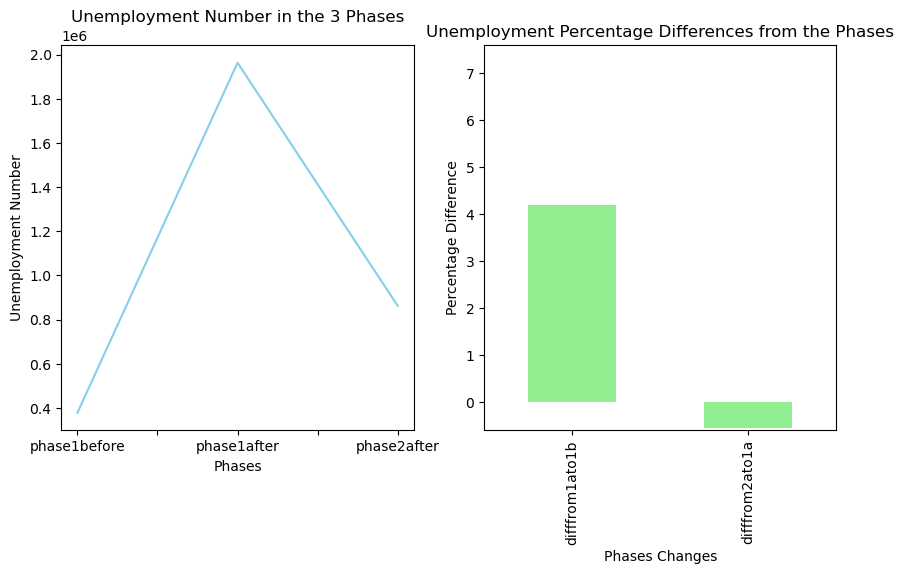

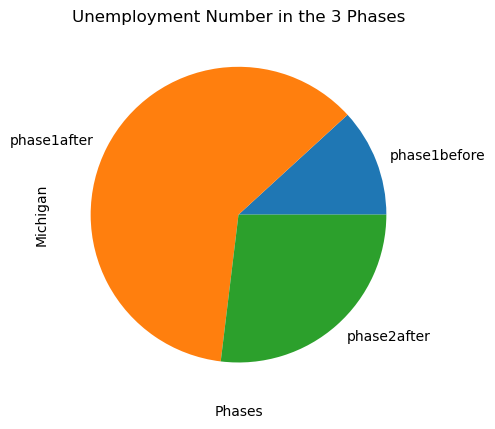

first_covid_case          NaN
phase1before        378164.85
phase1after        1963194.48
phase2after         862463.22
difffrom1ato1b           4.19
difffrom2ato1a          -0.56
Name: Michigan, dtype: float64

In [169]:
"""
Showing Michigan because we found out that Michigan has the lowest percentage difference from phase 1 after to phase 2 after.
Michigan looks like they were hit hard after the initial covid date with a percentage diff of 4.19 from phase 1 before to phase 1 after.
However, from phase 1 after to phase 2 after, with a -.56 percentage difference, looks like it got a little better than the 3 months after first covid.
"""

state_phases_graphs("Michigan")

In [170]:
"""
Revisitation of the final state data used for the graphs.
"""
state_data.head(100)

,first_covid_case,phase1before,phase1after,phase2after,difffrom1ato1b,difffrom2ato1a
state_name,,,,,,
Alabama,3/13/2020,132900.18,482381.09,355086.08,2.63,-0.26
Alaska,3/12/2020,39533.60,84719.01,61525.04,1.14,-0.27
Arizona,1/26/2020,341268.97,849395.01,581416.87,1.49,-0.32
Arkansas,3/11/2020,110513.51,264072.34,195795.08,1.39,-0.26
California,1/26/2020,1632818.14,6017126.76,4753135.14,2.69,-0.21
Colorado,3/6/2020,154035.11,674835.93,414542.07,3.38,-0.39
Connecticut,3/9/2020,133966.72,376827.21,336024.27,1.81,-0.11
Delaware,3/12/2020,42078.84,130928.95,78689.62,2.11,-0.40
Florida,3/2/2020,682156.63,2861610.98,1912533.97,3.19,-0.33
